In [1]:
%matplotlib inline

import numpy as np
from numpy import linalg as nla
import scipy as sp
from scipy import linalg as sla
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pprint import pprint
from time import time
import SHFunctions as shf
import os

from jupyterthemes import jtplot
jtplot.style(theme='solarizedl')

from IPython.core.display import display, HTML
np.set_printoptions(linewidth = 270)

In [2]:
A = shf.MakeGenSingA(5, 2, delta = .00001)
A

array([[[ 0.00000000e+00,  1.22838634e-01,  3.99865909e-02,  1.12199215e-01,  5.83055604e-02],
        [ 4.99710342e-04,  0.00000000e+00,  1.34358754e-01,  1.26004812e-01,  7.24667230e-02],
        [ 1.12240734e-01,  7.84877446e-02,  0.00000000e+00,  7.46453464e-02,  6.79561749e-02],
        [ 5.79882019e-02,  1.12525187e-01,  8.07812434e-02,  0.00000000e+00,  8.20353680e-02],
        [ 1.06640492e-01,  8.13002466e-02,  1.20328303e-01,  2.50609587e-02,  0.00000000e+00]],

       [[-1.00000000e+00,  6.72839409e-02,  1.04934268e-01,  1.00186680e-01,  6.09251112e-02],
        [ 8.80616674e-03, -1.00000000e+00,  7.09438319e-02,  3.80028975e-02,  2.15577104e-01],
        [ 1.06749620e-01,  3.37153799e-02, -1.00000000e+00,  8.97727316e-02,  1.03092269e-01],
        [ 1.31966789e-01,  1.52758573e-01,  1.27818570e-02, -1.00000000e+00,  3.58227811e-02],
        [ 9.24153045e-02,  9.63902035e-02,  8.98024267e-02,  5.47220653e-02, -1.00000000e+00]],

       [[ 1.00000000e-05,  6.00890331e-02,  9.

[[0.11611208 0.27448794 0.19245069 0.24532082 0.17159848]
 [0.12472851 0.15413638 0.29241048 0.25375659 0.17493805]
 [0.22104693 0.23664439 0.15496212 0.2088549  0.17846167]
 [0.15893825 0.26037305 0.2382421  0.14791539 0.19450121]
 [0.21331568 0.23264248 0.27083853 0.16766403 0.11550928]]


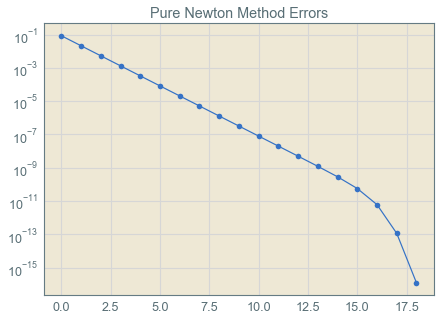

In [3]:
Ss = shf.NewtonPoly(A)
# ss = shf.SimpNewtonPoly(A)
# Ss = shf.NewtonPoly(A, X0 = np.array([[0, 1, 0],[0, 0, 1],[0, 0, 0]]))
# Ss = shf.NewtonPoly(A, X0 = 1 * np.eye(3))
fig = plt.figure(figsize=(7,5))
ax1 = fig.add_subplot(111)

ax1.semilogy(Ss['errs'],'-o')
ax1.set_title('Pure Newton Method Errors')

print(Ss['sol'])

### (Ordered) Eigenvalues of $-P'_{X_{i}}$'s 

In [4]:
# Derivative에 대한 eigenvalues와 vectors
Ds = []
EVs = []
for i in range(len(Ss['P_Xs'])):
    d, ev = nla.eig(-Ss['P_Xs'][i])
    Ds.append(d)
    EVs.append(ev)
min_i = np.argmin(np.abs(Ds[-1]))
# for i in range(len(Ds)):
#     print('{}-th : {}'.format(i, Ds[i]))
# print(EVs)

In [5]:
dss = np.zeros((Ds[-1].shape[0],len(Ds)))
dss = dss.astype(complex)
for i in range(len(EVs)):
    dss[:,i] = np.squeeze(Ds[i])
dss.sort(0) # Ordering

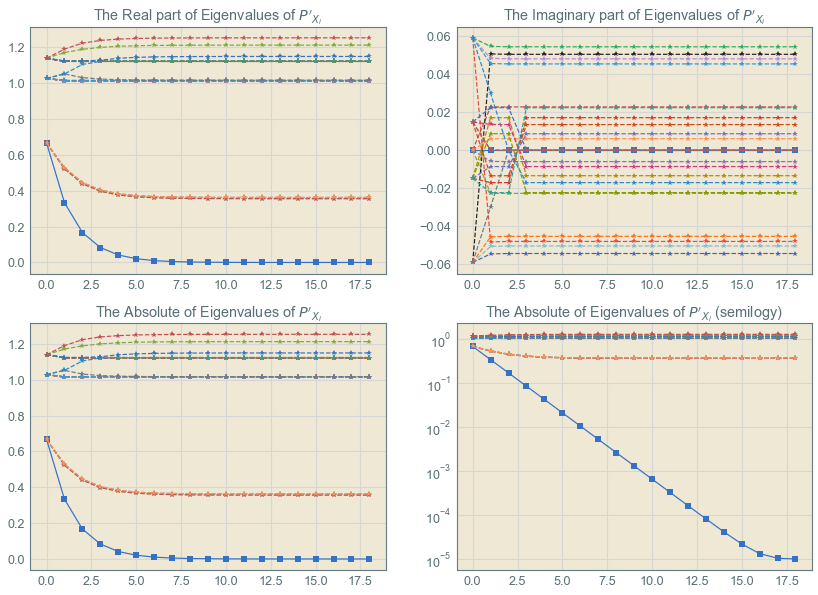

In [6]:
fig = plt.figure(figsize=(14,10))
ax1 = fig.add_subplot(221)
ax1.set_title("The Real part of Eigenvalues of $P'_{X_{i}}$")

ax2 = fig.add_subplot(222)
ax2.set_title("The Imaginary part of Eigenvalues of $P'_{X_{i}}$")

ax3 = fig.add_subplot(223)
ax3.set_title("The Absolute of Eigenvalues of $P'_{X_{i}}$")

ax4 = fig.add_subplot(224)
ax4.set_title("The Absolute of Eigenvalues of $P'_{X_{i}}$ (semilogy)")

for i in range(dss.shape[0]):
    if i == min_i:
        ax1.plot(np.real(dss[i,:]),'-s')
        ax2.plot(np.imag(dss[i,:]),'-s')
        ax3.plot(np.abs(dss[i,:]),'-s')
        ax4.semilogy(np.abs(dss[i,:]),'-s')
    else:
        ax1.plot(np.real(dss[i,:]),'--*')
        ax2.plot(np.imag(dss[i,:]),'--*')
        ax3.plot(np.abs(dss[i,:]),'--*')
        ax4.semilogy(np.abs(dss[i,:]),'--*')

### Coefficients of Eigenvectors of $P'_{S}$ with respect to $H_{i}$

In [7]:
coeffi = np.zeros((Ss['Hs'][0].shape[0] * Ss['Hs'][0].shape[1],len(EVs)))
coeffi = coeffi.astype(complex)
for i in range(len(EVs)):
    h = nla.solve(EVs[-1], np.reshape(Ss['Hs'][i], (Ss['Hs'][i].shape[0] * Ss['Hs'][i].shape[1],1), order='F'))
    coeffi[:,i] = np.squeeze(h)
# coeffi.transpose()

cosine = np.zeros(len(EVs))
for i in range(len(EVs)):
    hi, hs = np.reshape(Ss['Hs'][i], (Ss['Hs'][i].shape[0] * Ss['Hs'][i].shape[1], ), order='F'), np.reshape(Ss['Hs'][-1], (Ss['Hs'][-1].shape[0] * Ss['Hs'][-1].shape[1], ), order='F')
    c = np.dot(hi, hs)/(nla.norm(hi,2) * nla.norm(hs,2))
    cosine[i] = c

c:\users\saibi\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in arccos
  from ipykernel import kernelapp as app


[0.92613594 0.99992682 0.99999935 0.99999998 1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.         1.        ]


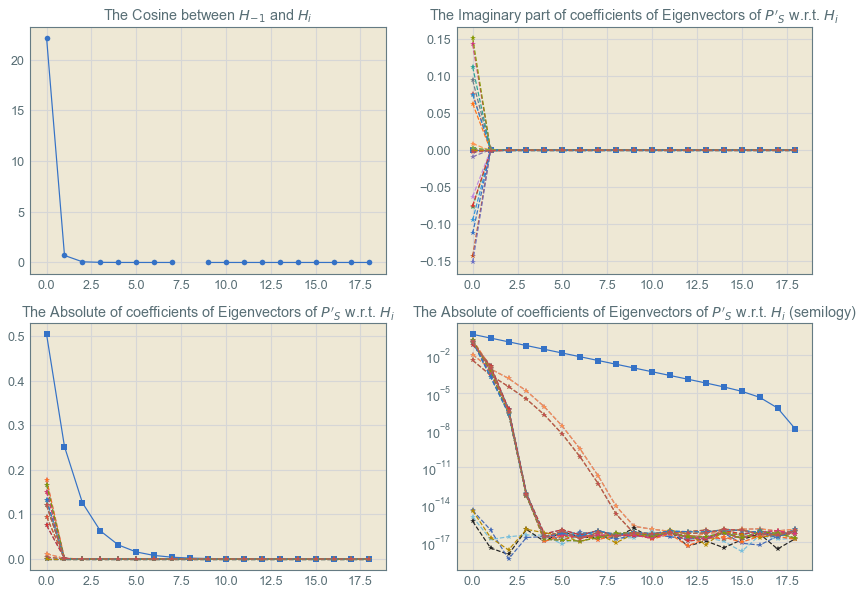

In [10]:
fig = plt.figure(figsize=(14,10))
ax1 = fig.add_subplot(221)
ax1.set_title("The Cosine between $H_{-1}$ and $H_{i}$")

ax2 = fig.add_subplot(222)
ax2.set_title("The Imaginary part of coefficients of Eigenvectors of $P'_{S}$ w.r.t. $H_{i}$")

ax3 = fig.add_subplot(223)
ax3.set_title("The Absolute of coefficients of Eigenvectors of $P'_{S}$ w.r.t. $H_{i}$")
# ax3.set_ylim([-.00001, .00101])

ax4 = fig.add_subplot(224)
ax4.set_title("The Absolute of coefficients of Eigenvectors of $P'_{S}$ w.r.t. $H_{i}$ (semilogy)")

ax1.plot(np.arccos(cosine)*180/np.pi,'-o')
for i in range(coeffi.shape[0]):
    if i == min_i:
        ax2.plot(np.imag(coeffi[i,:]),'-s')
        ax3.plot(np.abs(coeffi[i,:]),'-s')
        ax4.semilogy(np.abs(coeffi[i,:]),'-s')
    else:
        ax2.plot(np.imag(coeffi[i,:]),'--*')
        ax3.plot(np.abs(coeffi[i,:]),'--*')
        ax4.semilogy(np.abs(coeffi[i,:]),'--*')
        
print(cosine)

In [9]:
print(min_i)
print(Ds[-1][0])
print(np.real(EVs[-1][:,0]))
print(np.imag(EVs[-1][:,0]))
print(coeffi)

0
(1.0007684234078316e-05+0j)
[0.16587413 0.16587413 0.16587413 0.16587413 0.16587413 0.22626013 0.22626013 0.22626013 0.22626013 0.22626013 0.22726587 0.22726587 0.22726587 0.22726587 0.22726587 0.20383202 0.20383202 0.20383202 0.20383202 0.20383202 0.16761522 0.16761522 0.16761522 0.16761522
 0.16761522]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[[-5.04611022e-01-6.67888698e-18j -2.52305511e-01+2.83256367e-19j -1.26152755e-01-5.21788045e-20j -6.30763771e-02+1.16470546e-22j -3.15381877e-02-1.45588182e-22j -1.57690920e-02-5.45955683e-24j -7.88454237e-03-7.10879796e-26j -3.94226392e-03-1.66612452e-28j
  -1.97111743e-03+8.67773188e-31j -9.85529650e-04+8.13537364e-32j -4.92706702e-04-4.06768682e-32j -2.46237154e-04+6.77947803e-33j -1.22886566e-04-5.42358243e-32j -6.09823073e-05+1.35589561e-32j -2.95929788e-05-2.71179121e-32j -1.31729700e-05-3.89819987e-32j
  -4.32364309e-06-2.03384341e-32j -5.93699723e-07+3.05076512e-32j -1.16331680e-08+6.77947803e-32j]
